Loading Tomato_Septoria_leaf_spot: 100%|██████████| 1771/1771 [00:16<00:00, 109.24it/s]
Loading Tomato_Spider_mites_Two_spotted_spider_mite: 100%|██████████| 1676/1676 [00:16<00:00, 103.10it/s]
Loading Tomato_healthy: 100%|██████████| 1591/1591 [00:15<00:00, 100.02it/s]


✅ Dataset ready! Shape: (20638, 12288) (20638,)
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
✅ Training complete!
Accuracy: 0.7090600775193798
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.82      0.46      0.59       199
                     Pepper__bell___healthy       0.70      0.84      0.77       296
                      Potato___Early_blight       0.75      0.90      0.82       200
                       Potato___Late_blight       0.60      0.43      0.50       200
                           Potato___healthy       0.00     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


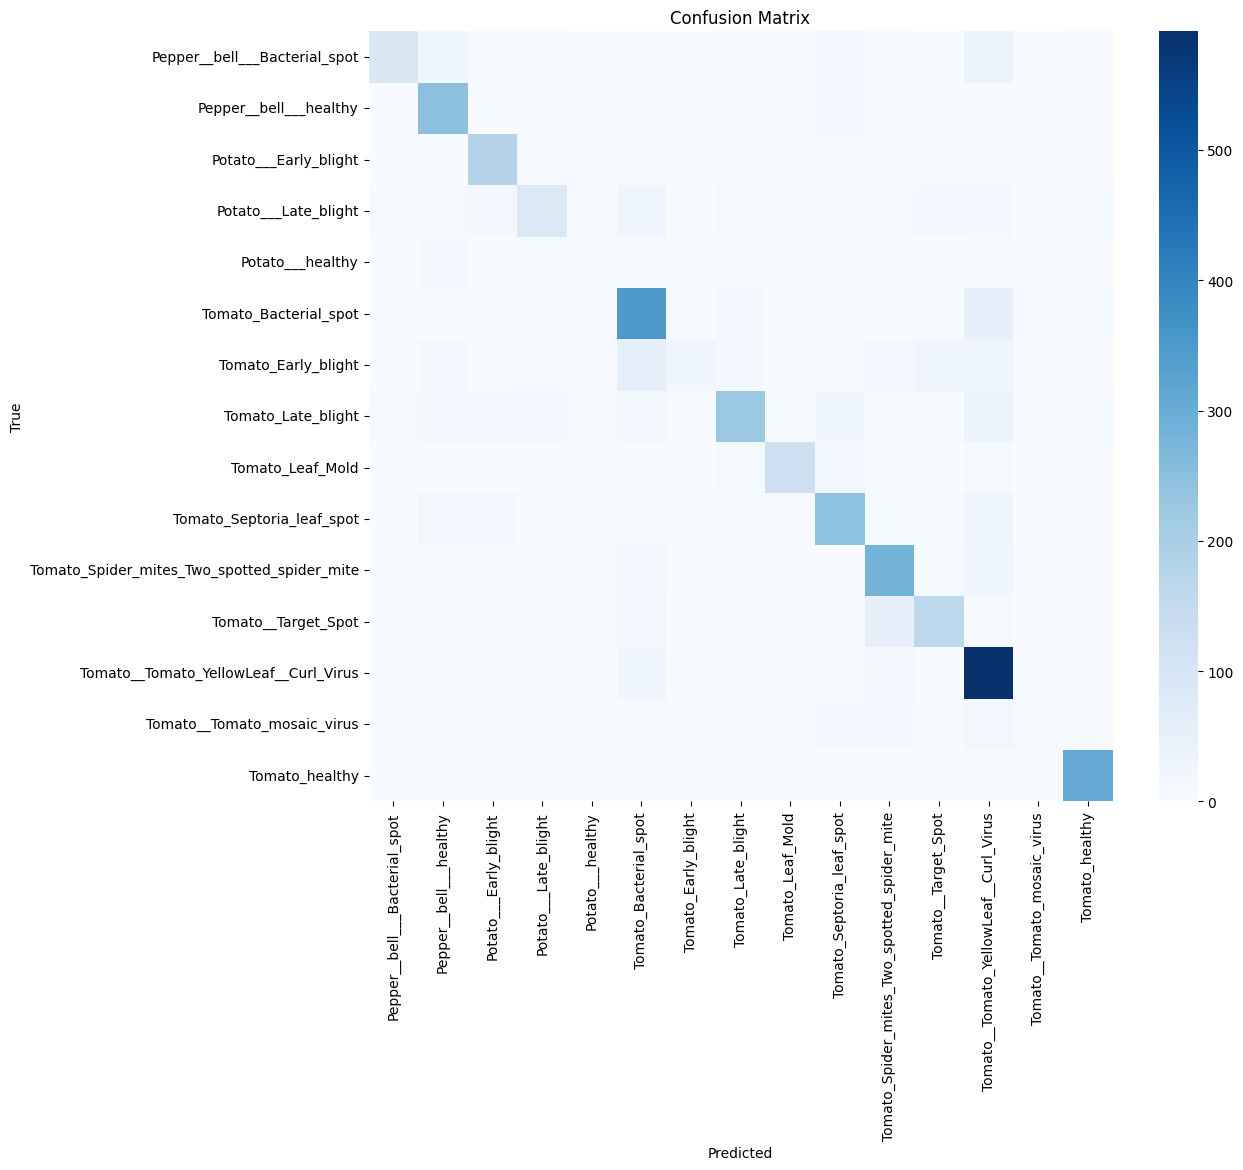

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
from skimage.color import gray2rgb
from tqdm import tqdm

# --- 1. Dataset path ---
data_dir = "/content/PlantDisease/PlantVillage"  # adjust if needed

# --- 2. Load dataset ---
X, y = [], []
classes = sorted(os.listdir(data_dir))  # class names

for idx, cls in enumerate(classes):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue
    for img_name in tqdm(os.listdir(cls_path), desc=f"Loading {cls}"):
        img_path = os.path.join(cls_path, img_name)
        try:
            img = imread(img_path)

            # --- Handle inconsistent channels ---
            if img.ndim == 2:  # grayscale → convert to RGB
                img = gray2rgb(img)
            elif img.shape[2] == 4:  # RGBA → drop alpha
                img = img[:, :, :3]

            img_resized = resize(img, (64, 64), anti_aliasing=True)
            X.append(img_resized.flatten())
            y.append(idx)
        except Exception as e:
            continue

X = np.array(X)
y = np.array(y)

print("✅ Dataset ready! Shape:", X.shape, y.shape)
print("Classes:", classes)

# --- 3. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Train model ---
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# --- 5. Evaluate ---
y_pred = clf.predict(X_test)

print("✅ Training complete!")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=classes))

# --- 6. Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(clf, "disease_classifier.pkl")

# Also save class names (since we didn’t use label_encoder here)
joblib.dump(classes, "classes.pkl")

['classes.pkl']

In [ ]:
joblib.dump(classes, "classes.pkl")

['classes.pkl']

In [ ]:
joblib.dump(clf, "disease_classifier.pkl")

['disease_classifier.pkl']

In [ ]:
from google.colab import files
files.download("classes.pkl")
files.download("disease_classifier.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>